# Code to implement the leapfrog scheme.

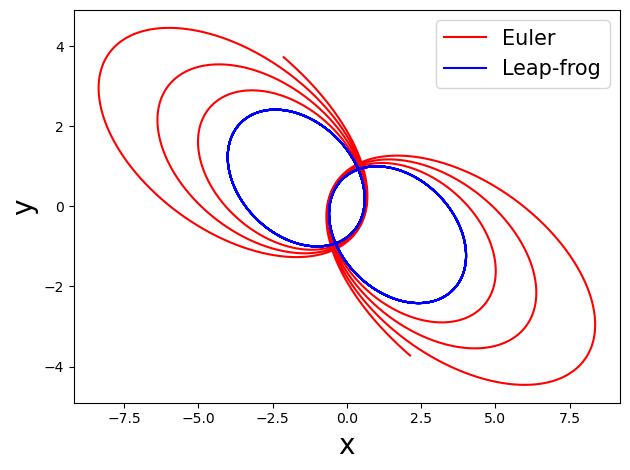

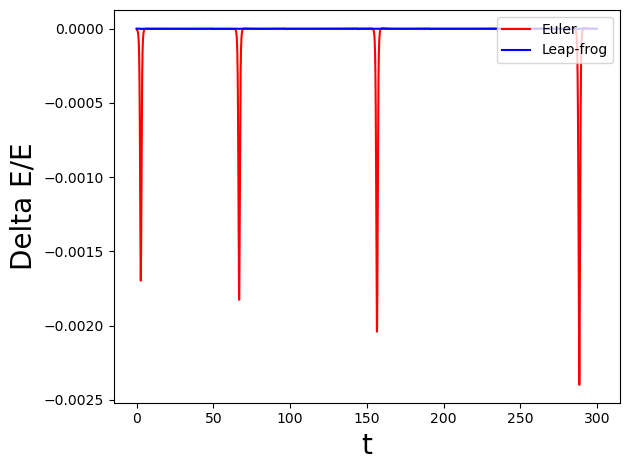

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 6 17:11:58 2020

@author: astro
"""
import numpy as np
import math as mt
import matplotlib.pyplot as plt

G=1
m1=m2=1
tin=0
tf=300
h=0.01
N=int((tf-tin)/h)
#x01=[1.0,1.0] #initial conditions of particle 1: x01=[x1,y1]
#x02=[-1.0,-1.0] #initial condition of particle 2: x02=[x2,y2]
#v01=[-0.5,0.0] #initial velocity of particle 1: v01=[vx1,vy1]
#v02=[0.5,0.0] #initial velocity of particle 2: v02=[vx2,vy2]
x1=[]
x1l=[] #leapfrog vector
x1.append(1.0)
x1l.append(1.0)
y1=[]
y1l=[] #leapfrog vector
y1.append(1.0)
y1l.append(1.0)
x2=[]
x2l=[] #leapfrog vector
x2.append(-1.0)
x2l.append(-1.0)
y2=[]
y2l=[] #leapfrog vector
y2.append(-1.0)
y2l.append(-1.0)
vx1=-0.5 #initial velocity of particle 1
vy1=0.0
vx2=0.5 #initial velocity of particle 2
vy2=0.0
E1=[]
E1.append(0.0)
E2=[]
E2.append(0.0)
t=[] #array for time 
t.append(0.0)

def a(x1,x2,y1,y2):
    ax=-G*m1*(x1-x2)/(((x1-x2)**2+(y1-y2)**2)**1.5)
    ay=-G*m1*(y1-y2)/(((x1-x2)**2+(y1-y2)**2)**1.5)
    a=[ax,ay]
    return a


def E(x1,x2,y1,y2,vx1,vx2,vy1,vy2): #total energy of the system
    Ek=0.5*m1*(vx1*vx1+vy1*vy1)+0.5*m2*(vx2*vx2+vy2*vy2)
    Eg=-G*m1*m2/mt.sqrt((x1-x2)**2+(y1-y2)**2)
    Etot=Ek+Eg
    return Etot


#Euler method 
for i in range(N-1):
    Ein=E(x1[i],x2[i],y1[i],y2[i],vx1,vx2,vy1,vy2)
    A=a(x1[i],x2[i],y1[i],y2[i])
    Ax=A[0]
    Ay=A[1]
#equation 140 for position x1 and y1
    X1=x1[i]+vx1*h 
    Y1=y1[i]+vy1*h
#equation 140 for position x2 and y2
    X2=x2[i]+vx2*h
    Y2=y2[i]+vy2*h
#store elements for array  
    x1.append(X1)
    y1.append(Y1)
    x2.append(X2)
    y2.append(Y2)
#equation 140 for velocity x1 and y1
    vx1=vx1+Ax*h
    vy1=vy1+Ay*h
    vx2=vx2-Ax*h
    vy2=vy2-Ay*h
#for the the total energy of the system to compare 
    Ef=E(X1,X2,Y1,Y2,vx1,vx2,vy1,vy2)
    deltaE=Ef-Ein
    e=deltaE/Ef
    E1.append(e)
     
   
#Leap-Frog method
vx1=-0.5 #initial velocity of particle 1
vy1=0.0
vx2=0.5 #initial velocity of particle 2
vy2=0.0
for i in range(N-1):
    Ein=E(x1l[i],x2l[i],y1l[i],y2l[i],vx1,vx2,vy1,vy2)
    A=a(x1l[i],x2l[i],y1l[i],y2l[i]) #Ai(t)
    Ax=A[0]
    Ay=A[1]
#Xi(t+h)
    X1=x1l[i]+vx1*h+0.5*h*h*Ax         
    Y1=y1l[i]+vy1*h+0.5*h*h*Ay         
#Yi(t+h)
    X2=x2l[i]+vx2*h-0.5*h*h*Ax         
    Y2=y2l[i]+vy2*h-0.5*h*h*Ay  
#store elements for array
    x1l.append(X1)
    y1l.append(Y1)
    x2l.append(X2)
    y2l.append(Y2)
#Ai(t+h)
    A2=a(X1,X2,Y1,Y2)   
    Ax2=A2[0]
    Ay2=A2[1]
#Vi(t+h)
    vx1=vx1+0.5*h*(Ax+Ax2) 
    vy1=vy1+0.5*h*(Ay+Ay2)
    vx2=vx2-0.5*h*(Ax+Ax2)
    vy2=vy2-0.5*h*(Ay+Ay2)
#for the the total energy of the system to compare 
    Ef=E(X1,X2,Y1,Y2,vx1,vx2,vy1,vy2)
    deltaE=Ef-Ein
    e=deltaE/Ef
    E2.append(e)
     
     
# for the time 
for i in range(N-1):
    T=t[i]+h
    t.append(T)
    

                    
#plot
g1x,=plt.plot(x1,y1,color='r') #Euler method
plt.plot(x2,y2,color='r') 
g2x,=plt.plot(x1l,y1l,color='b') #Leap-frog method
plt.plot(x2l,y2l,color='b')
plt.legend([g1x,g2x],['Euler','Leap-frog'],fontsize='15',loc='upper right')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.tight_layout()
plt.show()

e1,=plt.plot(t,E1,color='r') #Energy conservation with Euler method
e2,=plt.plot(t,E2,color='b') #Energy conservation with Leap-frog method
plt.legend([e1,e2], ['Euler','Leap-frog'],fontsize='10',loc='upper right')
plt.xlabel('t',fontsize=20)
plt.ylabel('Delta E/E', fontsize=20)
plt.tight_layout()
plt.show()
